In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

random.seed(12)

data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/feature selection and evaluation before data augmentation/data/myDataset_numerized_severity_lfc_1_DEGs_transposed.csv')

y_train = data.iloc[:, -1].values
X_train = data.iloc[:, :-1].values



In [3]:
y_train.shape
X_train.shape

(100, 916)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict


# Model evaluation on the original dataset (complete set of features)

clf_true = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(clf_true, X_train, y_train, cv=5)  # the number of folds (cv) can be adjusted as needed, we chose 5-fold cross validation

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

y_true_pred_cv = cross_val_predict(clf_true, X_train, y_train, cv=5) ##fit is called implicitely here
print("Cross-Validation classification report:")
print(metrics.classification_report(y_train, y_true_pred_cv))


Cross-Validation Scores: [0.95 0.75 0.75 0.7  0.9 ]
Mean Accuracy: 0.8100000000000002
Cross-Validation classification report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        51
           1       0.80      0.82      0.81        49

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [8]:

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_train, y_true_pred_cv)
TN, FP, FN, TP = conf_matrix.ravel()

#  Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Sensitivity: 0.8163265306122449
Specificity: 0.803921568627451


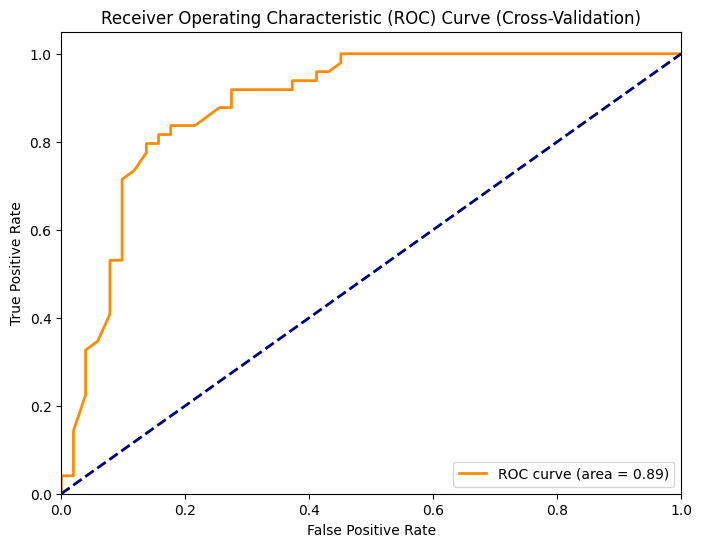

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# ROC evaluation (complete set of feature, original dataset)
y_true_prob_cv = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_train, y_true_prob_cv)

roc_auc_cv = roc_auc_score(y_train, y_true_prob_cv)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(max_depth=100, random_state=42)
clf = RFECV(rfc, step=1, cv=5)
clf.fit(X_train, y_train)

print("Optimal number of features : ", clf.n_features_)

print(clf.ranking_)

Optimal number of features :  337
[580 579 578 577 575 572 571 566 564 563 562 561 560 556 555 554 552 550
 549 535 533 530 528 527 524 523 518 517 516 515 514 512 511 510 507 504
 502 501 500 499 495 494 493 492 487 484 482 479 478 475 472 471 469 464
 462 452 448 446 432 431 429 193 175  75  65  52  47  44  40  39  38  37
  34  33   8   6   4   3   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1  49   1   1   1   1   1   1   1  53  76   1
  21  36   1   1   1   1   1   1   1   1  12   1   1 169   1   1   1   1
  74   1   1   1   1   1   1   1 173   1   1   1   1   1   1   1   1   1
  82   1   1   1   1   1   1  42   1   1   1 164   1   1   1  79 279   1
   1 151 156 147   1 244  59  19  18   1   1 274   1  71   1  81 273   1
 131   1   1   1   1   1 250   1   1   1   1 115   1   1   1 168 190  77
   1 177 125   1   1   1   1  63 349   1 149 199 135   1 213  69   1   1
   9   1   1   1 

In [ ]:
# Get the indices of the selected features
selected_feature_indices = np.where(clf.support_)[0]

# Get their names
optimal_features = data.columns[selected_feature_indices]

print("Optimal features: ", optimal_features)

optimal_features_df = pd.DataFrame({'Optimal Features': optimal_features})

optimal_features_df.to_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/feature selection and evaluation before data augmentation/data/beta_severity_lfc_1_optimal_features_before_DA.csv', index=False)

Optimal features:  Index(['ADAMTS2', 'PGS1', 'IRAK3', 'FLT3LG', 'NRCAM', 'CEBPE', 'TYRO3',
       'SMIM24', 'CRISP3', 'FKBP5',
       ...
       'ZNF781', 'PRTN3', 'TPK1', 'LAMA2', 'HLA.DQA1', 'TLE1', 'ARID5A',
       'SRGAP1', 'KIAA1671', 'ZNF860'],
      dtype='object', length=337)


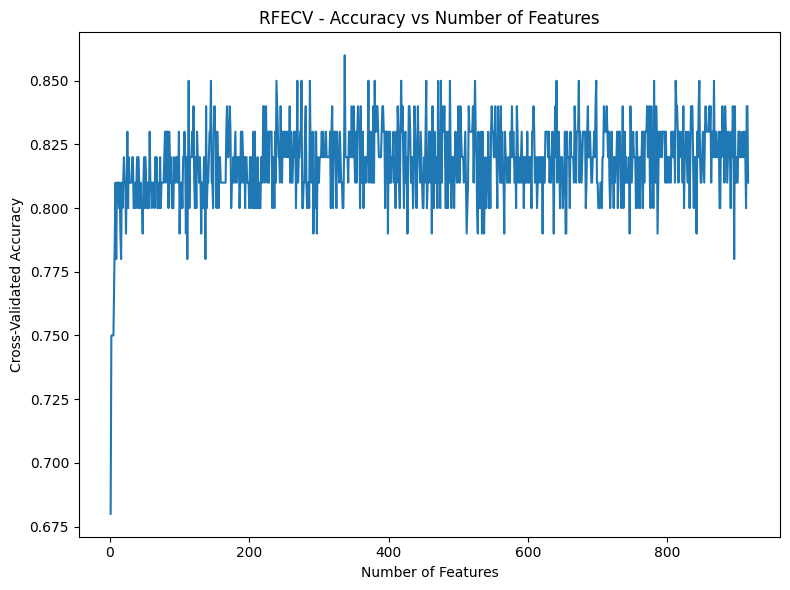

In [ ]:
#relationship between the number of features used in the RandomForestClassifier and the corresponding cross-validated
# accuracy during the RFECV (Recursive Feature Elimination with Cross-Validation) process
# Ploting accuracy versus number of features
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(clf.cv_results_['mean_test_score']) + 1), clf.cv_results_['mean_test_score'])
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validated Accuracy")
plt.title("RFECV - Accuracy vs Number of Features")
plt.tight_layout()
plt.show()

Top 15 Important Features:
PGD: 0.05302197430849021
MCEMP1: 0.031107043063876936
GRB10: 0.02920628271416806
SIRT5: 0.02507803205413434
TXN: 0.020285345140328696
IL1R2: 0.0174989224242751
MYBL1: 0.017469754258024207
PTCH1: 0.016870233273027238
ALOX5AP: 0.014589670942744099
IL18RAP: 0.014582609689756186
MMP9: 0.014562503766918596
GADD45A: 0.013976733423235346
HMGB2: 0.013925665732088297
PEAK3: 0.013881226513836688
SCRG1: 0.013289645017920277


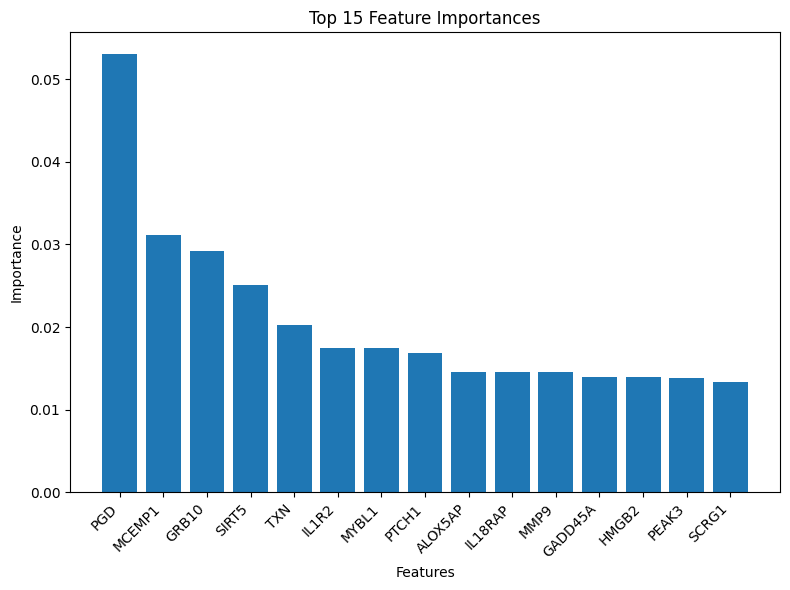

In [ ]:
#Plotting the 15 most important features

#feature importances
rfc.fit(X_train[:, selected_feature_indices], y_train)
feature_importances = rfc.feature_importances_
top_15_indices = np.argsort(feature_importances)[::-1][:15]

top_15_features = optimal_features[top_15_indices]
top_15_importances = feature_importances[top_15_indices]

# Print top 15 important features and their importance scores
print("Top 15 Important Features:")
for feature, importance in zip(top_15_features, top_15_importances):
    print(f"{feature}: {importance}")


# Plot them
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_15_features)), top_15_importances)
plt.xticks(range(len(top_15_features)), top_15_features, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()